# Data analysis and visualization: English Premier League & UEFA Champions League Winner  2018-19

**OBJECTIVE OF THE PROJECT**

1)**Physical attribute:** Correlation between Body Mass Index of the players and stamina to asses how much prepration is  requird in keeping the players ready to meet the phsical demands of a long season. 

2)**Cost effectiveness:** Comparing the Wages of the players to assess how much money was spent in wages to acheive the      results.

3)**Home talent:** Ratio of home players to foreign players in the respective team to assess how much importance do the club give to groom players for national team.

4)**Playing Attribute:** Positioning,composure and weaker foot ability of the players to assess how effective are player's      positioning  and composure along wth weaker foot ability in the field which helps in gameplay and ultimately in scoring/defending  goals during matches.


In [1]:
# changing the working directory
import os
os.chdir("W:\Analysis")
os.getcwd()

'W:\\Analysis'

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the data from current working directory
df= pd.read_csv("Data.csv")

In [4]:
df.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [5]:
#Checking the number of rows and columns in the dataframe
df.shape

(18207, 89)

In [6]:
#Selecting only Liverpool and Man City player from the whole dataframe
df= df[(df['Club']== 'Liverpool') |(df['Club']== 'Manchester City')]
df.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
23,23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
26,26,209331,M. Salah,26,https://cdn.sofifa.org/players/4/19/209331.png,Egypt,https://cdn.sofifa.org/flags/111.png,88,89,Liverpool,...,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M
55,55,222492,L. Sané,22,https://cdn.sofifa.org/players/4/19/222492.png,Germany,https://cdn.sofifa.org/flags/21.png,86,92,Manchester City,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M


In [7]:
#Checking the columns names in dataframe to determine which columns will be required to achieve the objective of the project
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
#removing unnecessary columns and trimming the data
df.drop(['Unnamed: 0', 'ID','Flag','Club Logo','Photo','Special','Body Type','Real Face','Jersey Number','Joined', 'Loaned From','Contract Valid Until','LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','Release Clause','Potential','Skill Moves','Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
'Jumping','Strength', 'LongShots', 'Aggression','Interceptions','Vision', 'Penalties','Marking', 'StandingTackle', 'SlidingTackle','Preferred Foot','GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace =True)
df.head(5)

,Name,Age,Nationality,Overall,Club,Value,Wage,International Reputation,Weak Foot,Work Rate,Position,Height,Weight,Stamina,Positioning,Composure
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,4.0,5.0,High/ High,RCM,5'11,154lbs,90.0,87.0,88.0
13,David Silva,32,Spain,90,Manchester City,€60M,€285K,4.0,2.0,High/ Medium,LCM,5'8,148lbs,78.0,89.0,93.0
23,S. Agüero,30,Argentina,89,Manchester City,€64.5M,€300K,4.0,4.0,High/ Medium,ST,5'8,154lbs,76.0,92.0,90.0
26,M. Salah,26,Egypt,88,Liverpool,€69.5M,€255K,3.0,3.0,High/ Medium,RM,5'9,157lbs,84.0,90.0,91.0
55,L. Sané,22,Germany,86,Manchester City,€61M,€195K,2.0,3.0,High/ Medium,LW,6'0,165lbs,79.0,84.0,78.0


In [9]:
#checking rows and columns 
df.shape

(66, 16)

In [10]:
#dropping work rate from the dataframe

In [11]:
df.drop(['Work Rate','Value'],axis= 1,inplace=True)


In [12]:
df.head(2)

,Name,Age,Nationality,Overall,Club,Wage,International Reputation,Weak Foot,Position,Height,Weight,Stamina,Positioning,Composure
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K,4.0,5.0,RCM,5'11,154lbs,90.0,87.0,88.0
13,David Silva,32,Spain,90,Manchester City,€285K,4.0,2.0,LCM,5'8,148lbs,78.0,89.0,93.0


In [13]:

#Proceeding further for Data Analysis and Visualization

In [14]:

df['Weight'] =df['Weight'].apply(lambda x: x.strip('lbs'))
df.rename(columns={'Weight' :'Weight_lbs' }, inplace= True)
df.head(3)

,Name,Age,Nationality,Overall,Club,Wage,International Reputation,Weak Foot,Position,Height,Weight_lbs,Stamina,Positioning,Composure
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K,4.0,5.0,RCM,5'11,154,90.0,87.0,88.0
13,David Silva,32,Spain,90,Manchester City,€285K,4.0,2.0,LCM,5'8,148,78.0,89.0,93.0
23,S. Agüero,30,Argentina,89,Manchester City,€300K,4.0,4.0,ST,5'8,154,76.0,92.0,90.0


In [15]:
df['Wage'] =df['Wage'].apply(lambda x: x.strip('€'))
df['Wage']= df['Wage'].apply(lambda x: x.replace('K', '000'))
df.rename(columns={'Wage' :'Wage_€'}, inplace= True)

df.head(3)

,Name,Age,Nationality,Overall,Club,Wage_€,International Reputation,Weak Foot,Position,Height,Weight_lbs,Stamina,Positioning,Composure
4,K. De Bruyne,27,Belgium,91,Manchester City,355000,4.0,5.0,RCM,5'11,154,90.0,87.0,88.0
13,David Silva,32,Spain,90,Manchester City,285000,4.0,2.0,LCM,5'8,148,78.0,89.0,93.0
23,S. Agüero,30,Argentina,89,Manchester City,300000,4.0,4.0,ST,5'8,154,76.0,92.0,90.0


# Feature Engineering to calculate BMI


In [16]:
#Physical attribute

In [17]:
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Wage_€                       object
International Reputation    float64
Weak Foot                   float64
Position                     object
Height                       object
Weight_lbs                   object
Stamina                     float64
Positioning                 float64
Composure                   float64
dtype: object

In [18]:
df[['Feet','Inch']] = df.Height.str.split("'",expand=True,)
df.head(3)

,Name,Age,Nationality,Overall,Club,Wage_€,International Reputation,Weak Foot,Position,Height,Weight_lbs,Stamina,Positioning,Composure,Feet,Inch
4,K. De Bruyne,27,Belgium,91,Manchester City,355000,4.0,5.0,RCM,5'11,154,90.0,87.0,88.0,5,11
13,David Silva,32,Spain,90,Manchester City,285000,4.0,2.0,LCM,5'8,148,78.0,89.0,93.0,5,8
23,S. Agüero,30,Argentina,89,Manchester City,300000,4.0,4.0,ST,5'8,154,76.0,92.0,90.0,5,8


In [19]:

df['Inch'] = df.Inch.astype(float)
df['Feet'] = df.Feet.astype(float)

In [20]:
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Wage_€                       object
International Reputation    float64
Weak Foot                   float64
Position                     object
Height                       object
Weight_lbs                   object
Stamina                     float64
Positioning                 float64
Composure                   float64
Feet                        float64
Inch                        float64
dtype: object

In [21]:
df['Feet'] = df['Feet'].apply(lambda x: x*12)
df['Height_inches']=df['Feet'] + df['Inch']
df['Height_metres'] = df['Height_inches'].apply(lambda x: x*0.0254)

In [22]:
df.drop(['Feet', 'Inch','Height_inches'], axis = 1, inplace= True)
df

,Name,Age,Nationality,Overall,Club,Wage_€,International Reputation,Weak Foot,Position,Height,Weight_lbs,Stamina,Positioning,Composure,Height_metres
4,K. De Bruyne,27,Belgium,91,Manchester City,355000,4.0,5.0,RCM,5'11,154,90.0,87.0,88.0,1.8034
13,David Silva,32,Spain,90,Manchester City,285000,4.0,2.0,LCM,5'8,148,78.0,89.0,93.0,1.7272
23,S. Agüero,30,Argentina,89,Manchester City,300000,4.0,4.0,ST,5'8,154,76.0,92.0,90.0,1.7272
26,M. Salah,26,Egypt,88,Liverpool,255000,3.0,3.0,RM,5'9,157,84.0,90.0,91.0,1.7526
55,L. Sané,22,Germany,86,Manchester City,195000,2.0,3.0,LW,6'0,165,79.0,84.0,78.0,1.8288
56,Bernardo Silva,23,Portugal,86,Manchester City,180000,2.0,3.0,RW,5'8,141,78.0,83.0,85.0,1.7272
57,Ederson,24,Brazil,86,Manchester City,125000,2.0,3.0,GK,6'2,190,41.0,20.0,70.0,1.8796
58,S. Mané,26,Senegal,86,Liverpool,195000,3.0,4.0,LM,5'9,152,84.0,87.0,80.0,1.7526
59,V. van Dijk,26,Netherlands,86,Liverpool,165000,3.0,3.0,LCB,6'4,203,71.0,41.0,83.0,1.9304
60,R. Sterling,23,England,86,Manchester City,195000,3.0,3.0,RW,5'7,152,78.0,87.0,77.0,1.7018


,Name,Age,Nationality,Overall,Club,Wage_€,International Reputation,Weak Foot,Position,Height,Weight_lbs,Stamina,Positioning,Composure,Height_metres
4,K. De Bruyne,27,Belgium,91,Manchester City,355000,4.0,5.0,RCM,5'11,154,90.0,87.0,88.0,1.8034
13,David Silva,32,Spain,90,Manchester City,285000,4.0,2.0,LCM,5'8,148,78.0,89.0,93.0,1.7272
23,S. Agüero,30,Argentina,89,Manchester City,300000,4.0,4.0,ST,5'8,154,76.0,92.0,90.0,1.7272
26,M. Salah,26,Egypt,88,Liverpool,255000,3.0,3.0,RM,5'9,157,84.0,90.0,91.0,1.7526
55,L. Sané,22,Germany,86,Manchester City,195000,2.0,3.0,LW,6'0,165,79.0,84.0,78.0,1.8288


In [24]:
df['Weight_lbs'] = df.Weight_lbs.astype(float)
df['Weight_kg'] = df['Weight_lbs'].apply(lambda x: x*0.453592)
df.drop(['Weight_lbs', 'Height'], axis = 1, inplace= True)

df.head()

,Name,Age,Nationality,Overall,Club,Wage_€,International Reputation,Weak Foot,Position,Stamina,Positioning,Composure,Height_metres,Weight_kg
4,K. De Bruyne,27,Belgium,91,Manchester City,355000,4.0,5.0,RCM,90.0,87.0,88.0,1.8034,69.853168
13,David Silva,32,Spain,90,Manchester City,285000,4.0,2.0,LCM,78.0,89.0,93.0,1.7272,67.131616
23,S. Agüero,30,Argentina,89,Manchester City,300000,4.0,4.0,ST,76.0,92.0,90.0,1.7272,69.853168
26,M. Salah,26,Egypt,88,Liverpool,255000,3.0,3.0,RM,84.0,90.0,91.0,1.7526,71.213944
55,L. Sané,22,Germany,86,Manchester City,195000,2.0,3.0,LW,79.0,84.0,78.0,1.8288,74.842680


In [28]:
df['BMI']=df['Weight_kg']/ (df['Height_metres'] * df['Height_metres'])
df

,Name,Age,Nationality,Overall,Club,Wage_€,International Reputation,Weak Foot,Position,Stamina,Positioning,Composure,Height_metres,Weight_kg,BMI
4,K. De Bruyne,27,Belgium,91,Manchester City,355000,4.0,5.0,RCM,90.0,87.0,88.0,1.8034,69.853168,21.478402
13,David Silva,32,Spain,90,Manchester City,285000,4.0,2.0,LCM,78.0,89.0,93.0,1.7272,67.131616,22.503074
23,S. Agüero,30,Argentina,89,Manchester City,300000,4.0,4.0,ST,76.0,92.0,90.0,1.7272,69.853168,23.415360
26,M. Salah,26,Egypt,88,Liverpool,255000,3.0,3.0,RM,84.0,90.0,91.0,1.7526,71.213944,23.184590
55,L. Sané,22,Germany,86,Manchester City,195000,2.0,3.0,LW,79.0,84.0,78.0,1.8288,74.842680,22.377775
56,Bernardo Silva,23,Portugal,86,Manchester City,180000,2.0,3.0,RW,78.0,83.0,85.0,1.7272,63.956472,21.438739
57,Ederson,24,Brazil,86,Manchester City,125000,2.0,3.0,GK,41.0,20.0,70.0,1.8796,86.182480,24.394286
58,S. Mané,26,Senegal,86,Liverpool,195000,3.0,4.0,LM,84.0,87.0,80.0,1.7526,68.945984,22.446227
59,V. van Dijk,26,Netherlands,86,Liverpool,165000,3.0,3.0,LCB,71.0,41.0,83.0,1.9304,92.079176,24.709662
60,R. Sterling,23,England,86,Manchester City,195000,3.0,3.0,RW,78.0,87.0,77.0,1.7018,68.945984,23.806302


C:\Users\Barun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


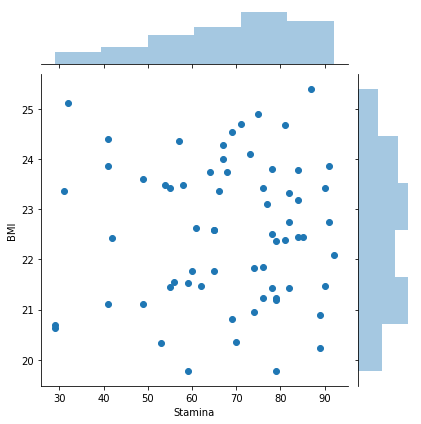

In [31]:
#sns.distplot(df['Stamina'],bins= 10)

sns.jointplot(x='Stamina',y= 'BMI', data= df)